n = 5, ||δb|| = 2.24e-10, ||δx|| = 1.44e-07
n = 6, ||δb|| = 2.45e-10, ||δx|| = 8.70e-07
n = 7, ||δb|| = 2.65e-10, ||δx|| = 5.24e-06
n = 8, ||δb|| = 2.83e-10, ||δx|| = 3.15e-05
n = 9, ||δb|| = 3.00e-10, ||δx|| = 1.88e-04
n = 10, ||δb|| = 3.16e-10, ||δx|| = 1.13e-03
n = 5, κ2(Hn) = 4.7661e+05
n = 6, κ2(Hn) = 1.4951e+07
n = 7, κ2(Hn) = 4.7537e+08
n = 8, κ2(Hn) = 1.5258e+10
n = 9, κ2(Hn) = 4.9315e+11
n = 10, κ2(Hn) = 1.6024e+13


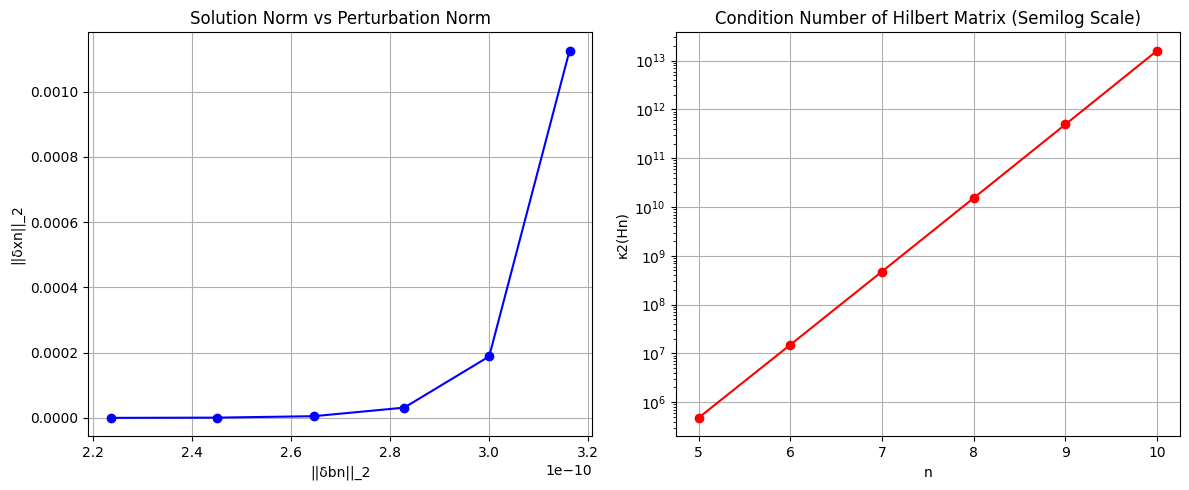


Bonus Part: Eigenvalue Methods
n = 5
  λ_max (Power): 1.567051e+00, λ_min (Inv Power): 3.287929e-06
  λ_max (RQI): 2.085342e-01, λ_min (RQI): 1.567051e+00
  Condition # (Power methods): 4.766073e+05
  Condition # (RQI): 1.330743e-01
  True Condition # (NumPy): 4.766073e+05
----------------------------------------
n = 6
  λ_max (Power): 1.618900e+00, λ_min (Inv Power): 1.082799e-07
  λ_max (RQI): 1.618900e+00, λ_min (RQI): 1.618900e+00
  Condition # (Power methods): 1.495106e+07
  Condition # (RQI): 1.000000e+00
  True Condition # (NumPy): 1.495106e+07
----------------------------------------
n = 7
  λ_max (Power): 1.660885e+00, λ_min (Inv Power): 3.493899e-09
  λ_max (RQI): 2.719202e-01, λ_min (RQI): 2.719202e-01
  Condition # (Power methods): 4.753674e+08
  Condition # (RQI): 1.000000e+00
  True Condition # (NumPy): 4.753674e+08
----------------------------------------
n = 8
  λ_max (Power): 1.695939e+00, λ_min (Inv Power): 1.111539e-10
  λ_max (RQI): 1.695939e+00, λ_min (RQI): 1.695

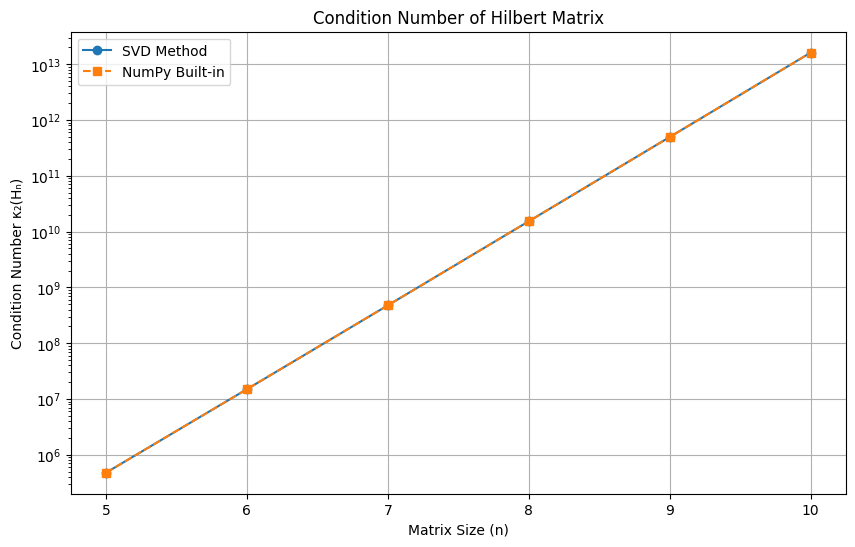

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert, norm, inv
from numpy.linalg import svd

# Part 1: Solving Hn*δxn = δbn for different n values
n_values = range(5, 11)
delta_b_norm = 1e-10  # Norm of perturbation vector δbn
residual_norms = []
delta_x_norms = []

for n in n_values:
    # Create Hilbert matrix of size n
    H_n = hilbert(n)

    # Create perturbation vector δbn = 10^(-10) * ones(n)
    delta_b = np.ones(n) * 1e-10

    # Solve the system H_n * delta_x = delta_b
    delta_x = np.linalg.solve(H_n, delta_b)

    # Calculate norms
    delta_b_norm_actual = norm(delta_b)
    delta_x_norm = norm(delta_x)

    # Store results
    delta_x_norms.append(delta_x_norm)
    residual_norms.append(delta_b_norm_actual)

    print(f"n = {n}, ||δb|| = {delta_b_norm_actual:.2e}, ||δx|| = {delta_x_norm:.2e}")

# Part 2: Computing condition numbers
condition_numbers = []

for n in n_values:
    # Create Hilbert matrix
    H_n = hilbert(n)

    # Compute condition number κ2(Hn) = ||Hn||_2 * ||Hn^(-1)||_2
    # Since ||A||_2 = σ_max(A), we can use SVD to compute this efficiently
    sigma_max = np.max(svd(H_n, compute_uv=False))
    sigma_min = np.min(svd(H_n, compute_uv=False))

    # The condition number is the ratio of largest to smallest singular value
    cond_num = sigma_max / sigma_min

    # Alternative calculation using scipy's norm function
    H_n_inv = inv(H_n)
    cond_num_alt = norm(H_n, 2) * norm(H_n_inv, 2)

    condition_numbers.append(cond_num)
    print(f"n = {n}, κ2(Hn) = {cond_num:.4e}")

# Plotting Part 1: ||δxn||_2 versus ||δbn||_2
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(residual_norms, delta_x_norms, 'o-', color='blue')
plt.xlabel('||δbn||_2')
plt.ylabel('||δxn||_2')
plt.title('Solution Norm vs Perturbation Norm')
plt.grid(True)

# Plotting Part 2: Condition number vs n (semilog)
plt.subplot(1, 2, 2)
plt.semilogy(n_values, condition_numbers, 'o-', color='red')
plt.xlabel('n')
plt.ylabel('κ2(Hn)')
plt.title('Condition Number of Hilbert Matrix (Semilog Scale)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 3 (Bonus): Power Iteration and Rayleigh Quotient Iteration

def power_iteration(A, num_iterations=100, tol=1e-10):
    """
    Power iteration method to find the largest eigenvalue and eigenvector
    """
    n = A.shape[0]
    x = np.random.rand(n)
    x = x / norm(x)

    for i in range(num_iterations):
        x_new = A @ x
        x_new = x_new / norm(x_new)

        # Check convergence
        if norm(x_new - x) < tol:
            break

        x = x_new

    # Compute Rayleigh quotient to get eigenvalue
    eigenvalue = (x @ A @ x) / (x @ x)

    return eigenvalue, x

def inverse_power_iteration(A, num_iterations=100, tol=1e-10):
    """
    Inverse power iteration to find the smallest eigenvalue and eigenvector
    """
    n = A.shape[0]
    x = np.random.rand(n)
    x = x / norm(x)

    for i in range(num_iterations):
        x_new = np.linalg.solve(A, x)
        x_new = x_new / norm(x_new)

        # Check convergence
        if norm(x_new - x) < tol:
            break

        x = x_new

    # Compute Rayleigh quotient to get eigenvalue
    eigenvalue = (x @ A @ x) / (x @ x)

    return eigenvalue, x

def rayleigh_quotient_iteration(A, num_iterations=100, tol=1e-10, target='largest'):
    """
    Rayleigh quotient iteration method to find eigenvalues and eigenvectors
    target: 'largest' or 'smallest'
    """
    n = A.shape[0]
    x = np.random.rand(n)
    x = x / norm(x)

    # Initial guess for eigenvalue using Rayleigh quotient
    mu = (x @ A @ x) / (x @ x)

    for i in range(num_iterations):
        # For smallest eigenvalue, we want to shift closer to it
        if target == 'smallest':
            # Solve (A - μI)x = b for x
            x_new = np.linalg.solve(A - mu * np.eye(n), x)
        else:
            # For largest eigenvalue, standard approach
            x_new = np.linalg.solve(A - mu * np.eye(n), x)

        x_new = x_new / norm(x_new)

        # Update eigenvalue estimate using Rayleigh quotient
        mu_new = (x_new @ A @ x_new) / (x_new @ x_new)

        # Check convergence
        if abs(mu_new - mu) < tol:
            break

        x = x_new
        mu = mu_new

    return mu, x

# Test the power methods on Hilbert matrices
print("\nBonus Part: Eigenvalue Methods")
print("=" * 40)

for n in n_values:
    H_n = hilbert(n)

    # Using power iteration
    max_eig_power, _ = power_iteration(H_n)

    # Using inverse power iteration
    min_eig_inv_power, _ = inverse_power_iteration(H_n)

    # Using Rayleigh quotient iteration for largest eigenvalue
    max_eig_rqi, _ = rayleigh_quotient_iteration(H_n, target='largest')

    # Using Rayleigh quotient iteration for smallest eigenvalue
    min_eig_rqi, _ = rayleigh_quotient_iteration(H_n, target='smallest')

    # Calculate condition number
    cond_num_power = max_eig_power / min_eig_inv_power
    cond_num_rqi = max_eig_rqi / min_eig_rqi

    # Compare with numpy's calculation
    true_cond = np.linalg.cond(H_n, 2)

    print(f"n = {n}")
    print(f"  λ_max (Power): {max_eig_power:.6e}, λ_min (Inv Power): {min_eig_inv_power:.6e}")
    print(f"  λ_max (RQI): {max_eig_rqi:.6e}, λ_min (RQI): {min_eig_rqi:.6e}")
    print(f"  Condition # (Power methods): {cond_num_power:.6e}")
    print(f"  Condition # (RQI): {cond_num_rqi:.6e}")
    print(f"  True Condition # (NumPy): {true_cond:.6e}")
    print("-" * 40)

# Plotting comparison of condition numbers
plt.figure(figsize=(10, 6))
cond_numbers_numpy = [np.linalg.cond(hilbert(n), 2) for n in n_values]

plt.semilogy(n_values, condition_numbers, 'o-', label='SVD Method')
plt.semilogy(n_values, cond_numbers_numpy, 's--', label='NumPy Built-in')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Condition Number κ₂(Hₙ)')
plt.title('Condition Number of Hilbert Matrix')
plt.legend()
plt.grid(True)
plt.show()